# <center><h2><b>Difuzní olejová vývěva</b></h2></center>


[**Návod**](https://richardsvejkar.cz/assets/02dov.pdf)
![Schema aparatury](files://C:/Users/aleks/Projects/arameic-mishmash/VKT/DOV/Data/Scheme.png/ "hehehzzzze")

In [1]:
import numpy as np
%matplotlib ipympl
import matplotlib.pyplot as plt
import pandas as pd
from inspect import signature
import sys
sys.path.append('C:/Users/aleks/Projects/arameic-mishmash')  
import my_module as mm
#!!! change it each time
path='C:/Users/aleks/Projects/arameic-mishmash/VKT/DOV/Data/'


 **Čerpání uzavřeného objemu**
 --
Čerpání začalo rotačka z atmosférického tlaku, po dosažení tlaku 10 Pa se otevřel ventil na difuzku, kvůli tomu se tlak trochu zvyšil (v samotné difuzce byla atmosféra). Následně už čerpala i difuzka.  
 **POZOR** Tlak se měřil postupně třemi různými měrkami, druhá je v Torrech  
 * Graf p(t)  
 * Vysvetlit jednotlivé změny 

In [2]:
tlak=pd.read_csv(f'{path}uloha1.csv', header=0, delimiter=';', decimal=',')
tlak.head()

,t,p
0,0,97200.0
1,10,12400.0
2,20,1100.0
3,30,150.0
4,40,46.0


C:\Users/aleks/Projects/arameic-mishmash\my_module.py:97: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.tight_layout()
C:\Users\aleks\anaconda3\lib\site-packages\ipympl\backend_nbagg.py:336: UserWarning: AutoMinorLocator does not work with logarithmic scale
  self.figure.savefig(buf, format='png', dpi='figure')


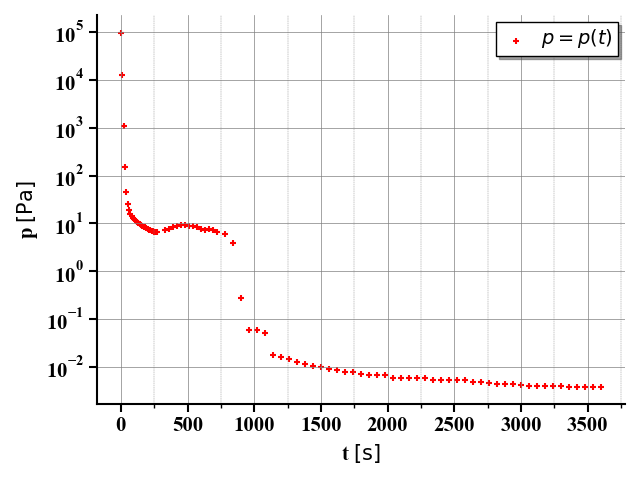

In [3]:
fig, ax1 = plt.subplots()
ax1.scatter(tlak['t'],tlak['p'], c='r', marker='+', s=15, label=r'$p=p(t)$')
ax1.set_yscale('log')
mm.plot_param(ax1, xlabel=r't $\mathrm{[s]}$', ylabel=r'p $\mathrm{[Pa]}$', grid = True, ticks=True)


 **Cejchování Penningova manometru**
 --
Vem si data peninga, data ionizacni vakuovky, udělej kalibracni krivku, jdi se projit

In [4]:
kalib=pd.read_csv(f'{path}kalib.csv', header=0, delimiter=';', decimal=',')
kalib.head()

,dilkyPi,pi,ppen
0,9.0,0.006000,0.02
1,2.5,0.016667,0.05
2,4.2,0.028000,0.10
3,6.5,0.043333,0.20


1. parameter = 1.99e-01 ± 2.51e-02
2. parameter = 5.05e-03 ± 2.89e-03
%%%%%%
$y=(1.99e-01\pm5.05e-03)x+2.51e-02\pm2.89e-03$


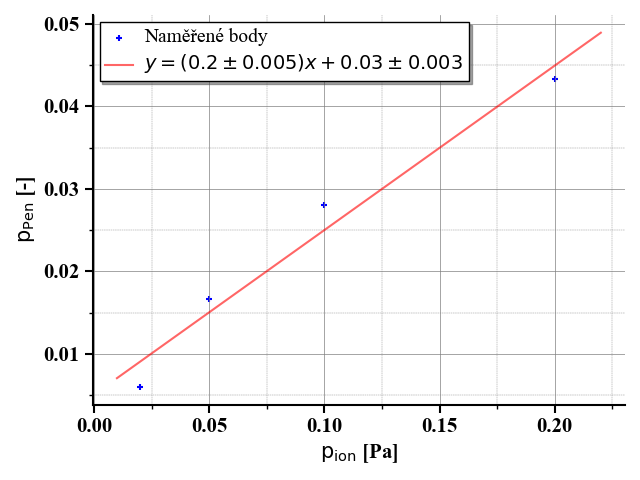

In [23]:
fig, ax2 = plt.subplots()
ax2.scatter(kalib['ppen'],kalib['pi'], c='b', marker='+', s=15, label='Naměřené body')

#fit
def krivka(x,a,b):
    y=a*x+b
    return y
fit, params=mm.split_fit(kalib[['ppen','pi']], krivka, extraplus=0.02, extraminus=1e-2)
label=fr'$y=({params[0][0]:.1}\pm{params[0][1]:.1})x+{params[1][0]:.1}\pm{params[1][1]:.1}$'
ax2.plot(fit['ppen'],fit['pi'], color='r', alpha=0.6, label=label)
mm.plot_param(ax2, xlabel=r'$\mathrm{p_{ion}}$ [Pa]', ylabel=r'$\mathrm{p_{Pen}}$ [-]', grid = True, ticks=True)
plt.show()


Vliv výstupního tlaku na funkci DOV
---
Záměrně jsme sabotovali ionizacni měrku zvyšením tlaku před DOV - chvíle kdy k tomu došlo je cvhíle kde DOV už nemohla čerpat s takovým tlakem

In [44]:
pir=pd.read_csv(f'{path}uloha3.csv', header=0, delimiter=';', decimal=',')
pir.head()


,p_i [Pa],p_pir[mbar],p_pir[Pa]
0,NaN,0.35,35.0
1,NaN,0.30,30.0
2,NaN,0.29,29.0
3,na nicc,0.23,23.0
4,na nicc,0.14,14.0


**Full data info:**

In [45]:
pir[['p_pir[Pa]', 'p_pir[mbar]']].describe()

,p_pir[Pa],p_pir[mbar]
count,5.000000,5.000000
mean,26.200000,0.262000
std,8.043631,0.080436
min,14.000000,0.140000
25%,23.000000,0.230000
50%,29.000000,0.290000
75%,30.000000,0.300000
max,35.000000,0.350000


**Info without two last shitty samples:**

In [50]:
pir[['p_pir[Pa]', 'p_pir[mbar]']][:3].describe()

,p_pir[Pa],p_pir[mbar]
count,3.000000,3.000000
mean,31.333333,0.313333
std,3.214550,0.032146
min,29.000000,0.290000
25%,29.500000,0.295000
50%,30.000000,0.300000
75%,32.500000,0.325000
max,35.000000,0.350000


Efektivní čerpací rychlos nad V2
---
